In [1]:
# 一、导入库和模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
# 二、查看第一次预处理后的数据概况
data = pd.read_csv('../1-Data_Set/train_V2_preprocessing.csv')
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
# 三、数据分类聚合
datas = data.groupby(by='matchType') #按游戏模式分组

lists_matchType = [] #定义游戏模式列表
for i,j in datas: #i是模式名称,j是该模式的数据
    print(i) #打印当前游戏模式
    lists_matchType.append(pd.DataFrame(j)) #转换j为Dataframe并保存在游戏模式列表

duo
duo-fpp
other
solo
solo-fpp
squad
squad-fpp


In [6]:
# 四、对solo模式进行特征选择并保存






In [10]:
# 1.提取solo模式数据
solo = lists_matchType[3]
solo.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
28,269c3fc4a26935,3c07be51998e6f,ce9bc89b3ca08c,0,1,100.00,0,0,0,24,...,0,0.0,0,61.0,0,0,1528.0,3,0,0.8462
52,73348483a5974b,1c8e486a643207,85601fe44d519b,0,0,17.81,0,0,0,79,...,0,129.3,0,0.0,0,0,471.9,3,1536,0.2245
57,caa1a36afeb7b2,c653cfca3b8b06,e5e181d2da0334,0,1,100.00,0,0,0,38,...,0,0.0,0,0.0,0,0,231.7,4,1500,0.1573
71,5fd62798396ca8,bb19a05801d30d,9e3c46f8acde82,0,0,36.00,0,0,0,84,...,0,0.0,0,0.0,0,0,292.6,1,0,0.1075
79,18d002b46b1abc,00a3f236559532,eccc44618c0442,0,1,236.00,0,0,7,7,...,0,0.0,0,0.0,0,0,1913.0,8,1557,0.9355


In [11]:
# 2.特征合并与预处理
# 删除不相关的列, 这是solo模式，与下面被删的列没有关系
solos = solo.loc[:,(solo.columns != 'groupId') & (solo.columns != 'matchId') & (solo.columns != 'revives') & (solo.columns != 'teamKills')]

# 按照游戏Id分组，查看是否存在一人玩了多次游戏，即死亡次数
so = solos.groupby(by='Id').count()
print(len(solos) == len(so)) #查看分组后是否与未分组时数量一致，即死亡是否超过一次

# 计算kda并插入数据集
list_solos_column = solos.columns.tolist() #获取列名并转换为集合
kda = (solos['kills'] + solos['assists']) / 1 #计算kda
solos.insert(list_solos_column.index('heals')+1,'kda',kda) #参数分别为插入位置，被插入列的列名，被插入列的数据

# 删除不相关列
solos.drop(['Id','assists','kills','matchType'],axis=1,inplace=True) #删除Id是其位非数值型数据，无法归一化
solos.head()

True


F:\Anaconda\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,boosts,damageDealt,DBNOs,headshotKills,heals,kda,killPlace,killPoints,killStreaks,longestKill,...,numGroups,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
28,1,100.00,0,0,0,1.0,24,0,1,21.250,...,89,1509,0.0,0,61.0,0,1528.0,3,0,0.8462
52,0,17.81,0,0,0,0.0,79,1274,0,0.000,...,95,-1,129.3,0,0.0,0,471.9,3,1536,0.2245
57,1,100.00,0,0,0,1.0,38,1000,1,7.667,...,86,-1,0.0,0,0.0,0,231.7,4,1500,0.1573
71,0,36.00,0,0,0,0.0,84,0,0,0.000,...,92,1507,0.0,0,0.0,0,292.6,1,0,0.1075
79,1,236.00,0,0,7,3.0,7,1142,1,11.720,...,88,-1,0.0,0,0.0,0,1913.0,8,1557,0.9355


In [12]:
# 3.数据无量纲化
# 数据归一化
scaler = MinMaxScaler() #实例化模型
result = scaler.fit_transform(solos) #训练和导出结果一步达成
df = pd.DataFrame(result,columns=solos.columns) #将归一化后的数据转换为Dataframe
df.head()

F:\Anaconda\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,boosts,damageDealt,DBNOs,headshotKills,heals,kda,killPlace,killPoints,killStreaks,longestKill,...,numGroups,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.055556,0.043995,0.0,0.0,0.000000,0.047619,0.232323,0.000000,0.076923,0.023050,...,0.897959,0.528341,0.00000,0.0,0.051564,0.0,0.126073,0.057692,0.000000,0.8462
1,0.000000,0.007835,0.0,0.0,0.000000,0.000000,0.787879,0.649337,0.000000,0.000000,...,0.959184,0.000000,0.00408,0.0,0.000000,0.0,0.038936,0.057692,0.811839,0.2245
2,0.055556,0.043995,0.0,0.0,0.000000,0.047619,0.373737,0.509684,0.076923,0.008317,...,0.867347,0.000000,0.00000,0.0,0.000000,0.0,0.019117,0.076923,0.792812,0.1573
3,0.000000,0.015838,0.0,0.0,0.000000,0.000000,0.838384,0.000000,0.000000,0.000000,...,0.928571,0.527642,0.00000,0.0,0.000000,0.0,0.024142,0.019231,0.000000,0.1075
4,0.055556,0.103828,0.0,0.0,0.142857,0.142857,0.060606,0.582059,0.076923,0.012713,...,0.887755,0.000000,0.00000,0.0,0.000000,0.0,0.157838,0.153846,0.822939,0.9355


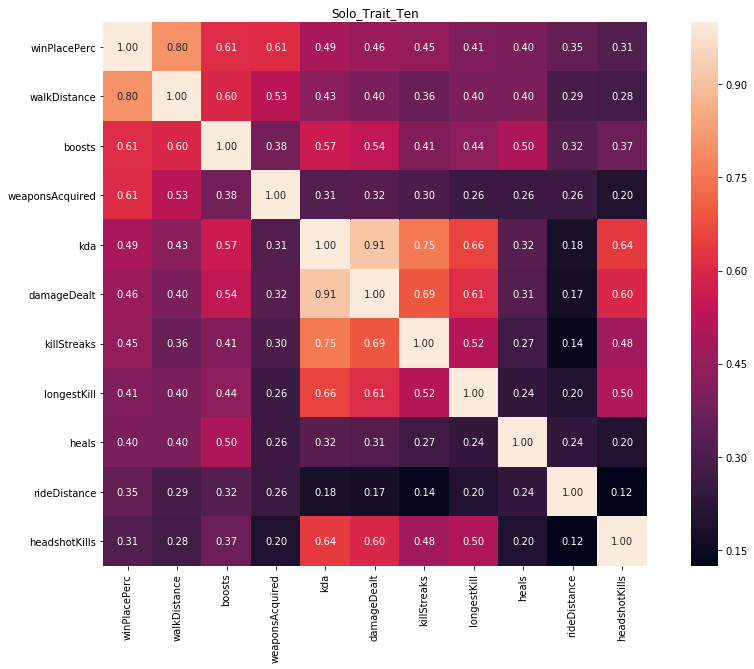

In [14]:
# 4.相关性过滤（绘制热图）
# 计算相关系数
corrmat = df.corr()

# 筛选出影响排名最高的前十因子
k = 11 #因为这个包括本身，所以k！=10，为11
cols = corrmat.nlargest(k, 'winPlacePerc')['winPlacePerc'].index #第一个参数就是截取的行数。第二个参数就是依据的列名

# 计算皮尔逊相关系数（度量两个变量之间的相关程度，其值介于-1与1之间）
cm = np.corrcoef(df[cols].values.T) #矩阵的行数=列数=矩阵1的行数*矩阵2的行数即 [10*10][1*1]

# 绘制相关系数图（heatmap）
plt.subplots(figsize=(16,10))
sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},xticklabels=cols.values,yticklabels=cols.values)
#热图参数含义网址:http://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.title('Solo_Trait_Ten') #设置标题
plt.savefig('./images/Solo_Trait_Ten.png') #保存图片

In [15]:
# 5.存储归一化后的solo模式数据
lists_solo_ten = list(cols) #获取相关性最高的十个特征并存为列表
data_solo = df.loc[:,lists_solo_ten] #获取数据
data_solo.to_csv('../1-Data_Set/data_solo_trait_ten.csv',index=None,encoding = 'utf-8') #存储数据

In [17]:
# 五、对solo-fpp模式进行特征选择并保存






In [20]:
# 1.提取solo-fpp模式数据（因为Python不支持-作为变量名故用_代替）
solo_fpp = lists_matchType[4]
solo_fpp.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0,0,0.00,0,0,49.75,2,0,0.1875
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0,0,0.00,0,0,1089.00,6,1500,0.7368
12,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,...,0,1228.0,0,76.84,0,0,2050.00,6,1462,0.8750
27,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,...,0,0.0,0,0.00,0,0,270.70,1,0,0.3474
39,0ba4529562941c,2e8fb650e28957,f7cb7612b6b768,0,0,194.500,0,1,1,19,...,0,0.0,0,0.00,0,0,248.60,5,0,0.2947


In [21]:
# 2.特征合并与预处理
# 删除不相关的列, 这是solo_fpp模式，与下面被删的列没有关系
solos_fpp = solo_fpp.loc[:,(solo_fpp.columns != 'groupId') & (solo_fpp.columns != 'matchId') & (solo_fpp.columns != 'revives') & (solo_fpp.columns != 'teamKills')]

# 按照游戏Id分组，查看是否存在一人玩了多次游戏，即死亡次数
so_fpp = solos_fpp.groupby(by='Id').count()
print(len(solos_fpp) == len(so_fpp)) #查看分组后是否与未分组时数量一致，即死亡是否超过一次

# 计算kda并插入数据集
list_solos_fpp_column = solos_fpp.columns.tolist() #获取列名并转换为集合
kda = (solos_fpp['kills'] + solos_fpp['assists']) / 1 #计算kda
solos_fpp.insert(list_solos_fpp_column.index('heals')+1,'kda',kda) #参数分别为插入位置，被插入列的列名，被插入列的数据

# 删除不相关列
solos_fpp.drop(['Id','assists','kills','matchType'],axis=1,inplace=True) #删除Id是其位非数值型数据，无法归一化
solos_fpp.head()

True


F:\Anaconda\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,boosts,damageDealt,DBNOs,headshotKills,heals,kda,killPlace,killPoints,killStreaks,longestKill,...,numGroups,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,0,100.000,0,0,0,1.0,45,0,1,58.53,...,95,1560,0.0,0,0.00,0,49.75,2,0,0.1875
7,0,8.538,0,0,0,0.0,48,1000,0,0.00,...,92,-1,2004.0,0,0.00,0,1089.00,6,1500,0.7368
12,1,324.200,0,1,5,4.0,5,986,1,49.83,...,94,-1,1228.0,0,76.84,0,2050.00,6,1462,0.8750
27,0,136.900,0,0,0,1.0,37,0,1,22.83,...,94,1500,0.0,0,0.00,0,270.70,1,0,0.3474
39,0,194.500,0,1,1,2.0,19,0,1,29.08,...,94,1460,0.0,0,0.00,0,248.60,5,0,0.2947


In [22]:
# 3.数据无量纲化
# 数据归一化
scaler = MinMaxScaler() #实例化模型
result = scaler.fit_transform(solos_fpp) #训练和导出结果一步达成
df = pd.DataFrame(result,columns=solos_fpp.columns) #将归一化后的数据转换为Dataframe
df.head()

F:\Anaconda\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,boosts,damageDealt,DBNOs,headshotKills,heals,kda,killPlace,killPoints,killStreaks,longestKill,...,numGroups,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.000000,0.043384,0.0,0.0000,0.000000,0.043478,0.444444,0.000000,0.2,0.062259,...,0.945652,0.546952,0.000000,0.0,0.000000,0.0,0.003642,0.071429,0.000000,0.1875
1,0.000000,0.003704,0.0,0.0000,0.000000,0.000000,0.474747,0.507614,0.0,0.000000,...,0.913043,0.000000,0.049226,0.0,0.000000,0.0,0.079722,0.214286,0.780437,0.7368
2,0.055556,0.140651,0.0,0.0625,0.089286,0.173913,0.040404,0.500508,0.2,0.053005,...,0.934783,0.000000,0.030165,0.0,0.063874,0.0,0.150073,0.214286,0.760666,0.8750
3,0.000000,0.059393,0.0,0.0000,0.000000,0.043478,0.363636,0.000000,0.2,0.024285,...,0.934783,0.525929,0.000000,0.0,0.000000,0.0,0.019817,0.035714,0.000000,0.3474
4,0.000000,0.084382,0.0,0.0625,0.017857,0.086957,0.181818,0.000000,0.2,0.030933,...,0.934783,0.511913,0.000000,0.0,0.000000,0.0,0.018199,0.178571,0.000000,0.2947


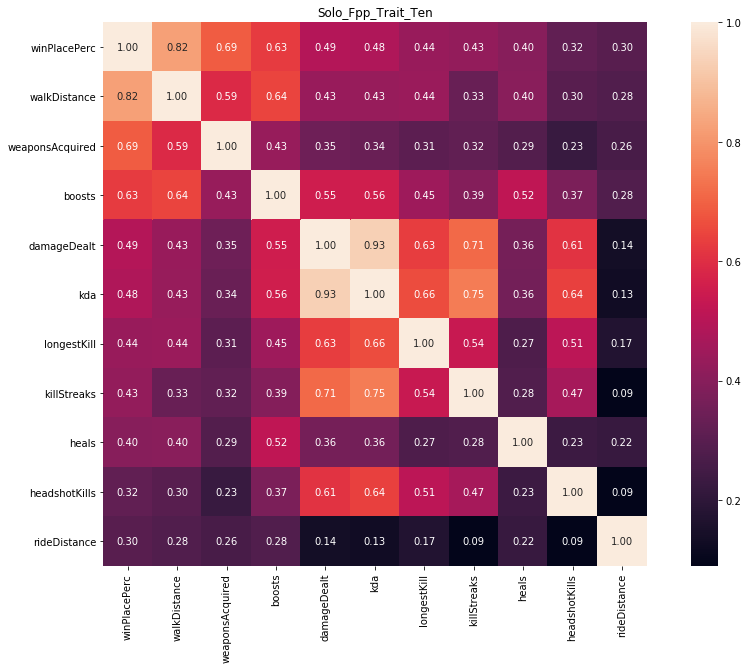

In [23]:
# 4.相关性过滤（绘制热图）
# 计算相关系数
corrmat = df.corr()

# 筛选出影响排名最高的前十因子
k = 11 #因为这个包括本身，所以k！=10，为11
cols = corrmat.nlargest(k, 'winPlacePerc')['winPlacePerc'].index #第一个参数就是截取的行数。第二个参数就是依据的列名

# 3.计算皮尔逊相关系数（度量两个变量之间的相关程度，其值介于-1与1之间）
cm = np.corrcoef(df[cols].values.T) #矩阵的行数=列数=矩阵1的行数*矩阵2的行数即 [10*10][1*1]

# 4.#绘制相关系数图（heatmap）
plt.subplots(figsize=(16,10))
sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},xticklabels=cols.values,yticklabels=cols.values)
#热图参数含义网址:http://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.title('Solo_Fpp_Trait_Ten') #设置标题
plt.savefig('./images/Solo_Fpp_Trait_Ten.png') #保存图片

In [24]:
# 5.存储归一化后的solo-fpp模式数据
lists_solo_fpp_ten = list(cols) #获取相关性最高的十个特征并存为列表
data_solo_fpp = df.loc[:,lists_solo_ten] #获取数据
data_solo_fpp.to_csv('../1-Data_Set/data_solo_fpp_trait_ten.csv',index=None,encoding = 'utf-8') #存储数据

In [25]:
# 六、对duo模式进行特征选择并保存






In [26]:
# 1.提取duo模式数据
duo = lists_matchType[0]
duo.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0,0,0.0,0,0,161.80,2,0,0.7755
23,ac5b57ff39979c,857cc55b2b6001,e019e04dee4f19,0,0,0.00,0,0,0,87,...,0,0.0,0,0.0,0,0,0.00,0,0,0.0000
24,3a4e362d28f411,b4fbf11bf33ac3,cf3d655571b26b,0,0,36.73,0,0,0,62,...,0,0.0,0,0.0,0,0,455.50,5,0,0.4255
87,de1e7870d95850,43f162c9b830a5,836bf5e3ff735d,0,0,100.00,1,0,0,83,...,0,0.0,0,0.0,0,0,43.67,1,1462,0.0816
90,caf2cdfae38ea0,adf73b968eaa52,2c224ee4e2b056,0,0,64.31,0,0,0,75,...,0,0.0,0,0.0,0,0,110.70,2,1467,0.0833


In [27]:
# 2.特征合并与预处理
# 删除不相关的列, 这是duo模式，尽管是组队模式，但组队Id对分析无影响
duos = duo.loc[:,(duo.columns != 'groupId') & (duo.columns != 'matchId')]

# 按照游戏Id分组，查看是否存在一人玩了多次游戏，即死亡次数
du = duos.groupby(by='Id').count()
print(len(duos) == len(du)) #查看分组后是否与未分组时数量一致，即死亡是否超过一次

# 计算kda并插入数据集
list_duos_column = duos.columns.tolist() #获取列名并转换为集合
kda = (duos['kills'] + duos['assists']) / 1 #计算kda
duos.insert(list_duos_column.index('heals')+1,'kda',kda) #参数分别为插入位置，被插入列的列名，被插入列的数据

# 删除不相关列
duos.drop(['Id','assists','kills','matchType'],axis=1,inplace=True) #删除Id是其位非数值型数据，无法归一化
duos.head()

True


F:\Anaconda\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,boosts,damageDealt,DBNOs,headshotKills,heals,kda,killPlace,killPoints,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2,0,68.00,0,0,0,1.0,47,0,0,0.0,...,0,0.0,0,0.0,0,0,161.80,2,0,0.7755
23,0,0.00,0,0,0,0.0,87,0,0,0.0,...,0,0.0,0,0.0,0,0,0.00,0,0,0.0000
24,0,36.73,0,0,0,0.0,62,0,0,0.0,...,0,0.0,0,0.0,0,0,455.50,5,0,0.4255
87,0,100.00,1,0,0,0.0,83,1000,0,0.0,...,0,0.0,0,0.0,0,0,43.67,1,1462,0.0816
90,0,64.31,0,0,0,0.0,75,1047,0,0.0,...,0,0.0,0,0.0,0,0,110.70,2,1467,0.0833


In [28]:
# 3.数据无量纲化
# 数据归一化
scaler = MinMaxScaler() #实例化模型
result = scaler.fit_transform(duos) #训练和导出结果一步达成
df = pd.DataFrame(result,columns=duos.columns) #将归一化后的数据转换为Dataframe
df.head()

F:\Anaconda\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,boosts,damageDealt,DBNOs,headshotKills,heals,kda,killPlace,killPoints,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.0,0.029147,0.000000,0.0,0.0,0.047619,0.464646,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.013841,0.020619,0.000000,0.7755
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.868687,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0000
2,0.0,0.015744,0.000000,0.0,0.0,0.000000,0.616162,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.038965,0.051546,0.000000,0.4255
3,0.0,0.042863,0.045455,0.0,0.0,0.000000,0.828283,0.536769,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003736,0.010309,0.801975,0.0816
4,0.0,0.027565,0.000000,0.0,0.0,0.000000,0.747475,0.561997,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.009470,0.020619,0.804717,0.0833


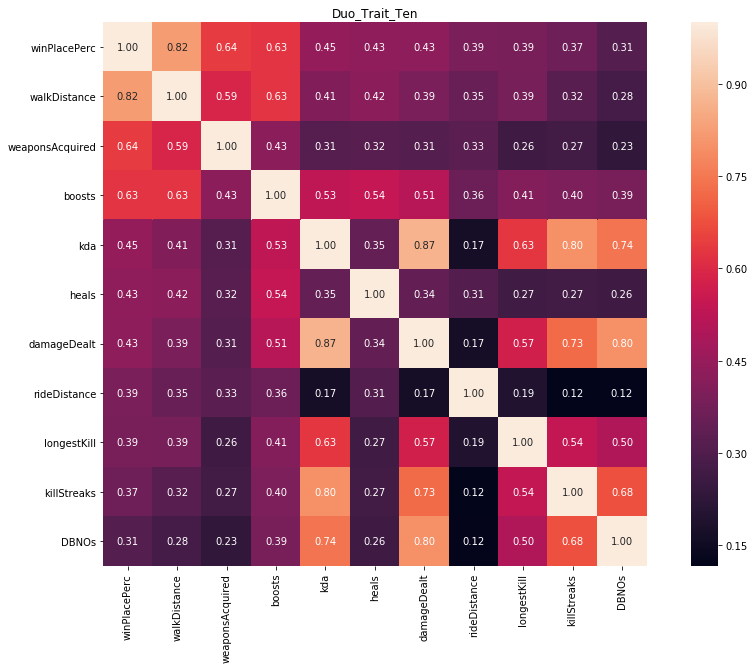

In [29]:
# 4.相关性过滤（绘制热图）
# 计算相关系数
corrmat = df.corr()

# 筛选出影响排名最高的前十因子
k = 11 #因为这个包括本身，所以k！=10，为11
cols = corrmat.nlargest(k, 'winPlacePerc')['winPlacePerc'].index #第一个参数就是截取的行数。第二个参数就是依据的列名

# 3.计算皮尔逊相关系数（度量两个变量之间的相关程度，其值介于-1与1之间）
cm = np.corrcoef(df[cols].values.T) #矩阵的行数=列数=矩阵1的行数*矩阵2的行数即 [10*10][1*1]

# 4.#绘制相关系数图（heatmap）
plt.subplots(figsize=(16,10))
sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},xticklabels=cols.values,yticklabels=cols.values)
#热图参数含义网址:http://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.title('Duo_Trait_Ten') #设置标题
plt.savefig('./images/Duo_Trait_Ten.png') #保存图片

In [30]:
# 5.存储归一化后的duo模式数据
lists_duo_ten = list(cols) #获取相关性最高的十个特征并存为列表
data_duo = df.loc[:,lists_duo_ten] #获取数据
data_duo.to_csv('../1-Data_Set/data_duo_trait_ten.csv',index=None,encoding = 'utf-8') #存储数据

In [37]:
# 七、对duo_fpp模式进行特征选择并保存






In [38]:
# 1.提取duo-fpp模式数据
duo_fpp = lists_matchType[1]
duo_fpp.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
11,8de328a74658a9,f643df9df3877c,80170383d90003,0,0,137.90,1,0,0,64,...,0,0.0,0,0.0,0,0,451.70,1,0,0.4043
14,12d8d4bd94312c,fe52d481bae68b,6fd9e765ddd0c5,0,0,80.71,1,0,0,72,...,1,0.0,0,0.0,0,0,105.10,5,0,0.2766
17,02ace8c6e58461,a4bc548028f800,80f2b8448e474b,0,4,269.10,0,1,8,18,...,1,2734.0,0,0.0,0,0,1794.00,5,0,0.6383
21,dbf611495bfda3,10cbb86844dee0,2cdae31ee18601,0,4,381.20,2,1,2,7,...,0,1798.0,0,0.0,0,0,1933.00,4,0,0.7234
29,c520f86dcd195a,4fffd636a4e0cc,e580bfc77e76cf,0,0,0.00,0,0,0,82,...,0,0.0,0,0.0,0,0,60.93,1,1501,0.0889


In [39]:
# 2.特征合并与预处理
# 删除不相关的列, 这是duo-fpp模式，尽管是组队模式，但组队Id对分析无影响
duos_fpp = duo_fpp.loc[:,(duo_fpp.columns != 'groupId') & (duo_fpp.columns != 'matchId')]

# 按照游戏Id分组，查看是否存在一人玩了多次游戏，即死亡次数
du_fpp = duos_fpp.groupby(by='Id').count()
print(len(duos_fpp) == len(du_fpp)) #查看分组后是否与未分组时数量一致，即死亡是否超过一次

# 计算kda并插入数据集
list_duos_fpp_column = duos_fpp.columns.tolist() #获取列名并转换为集合
kda = (duos_fpp['kills'] + duos_fpp['assists']) / 1 #计算kda
duos_fpp.insert(list_duos_fpp_column.index('heals')+1,'kda',kda) #参数分别为插入位置，被插入列的列名，被插入列的数据

# 删除不相关列
duos_fpp.drop(['Id','assists','kills','matchType'],axis=1,inplace=True) #删除Id是其位非数值型数据，无法归一化
duos_fpp.head()

True


F:\Anaconda\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,boosts,damageDealt,DBNOs,headshotKills,heals,kda,killPlace,killPoints,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
11,0,137.90,1,0,0,0.0,64,0,0,0.000,...,0,0.0,0,0.0,0,0,451.70,1,0,0.4043
14,0,80.71,1,0,0,0.0,72,0,0,0.000,...,1,0.0,0,0.0,0,0,105.10,5,0,0.2766
17,4,269.10,0,1,8,2.0,18,0,1,7.438,...,1,2734.0,0,0.0,0,0,1794.00,5,0,0.6383
21,4,381.20,2,1,2,4.0,7,0,2,42.130,...,0,1798.0,0,0.0,0,0,1933.00,4,0,0.7234
29,0,0.00,0,0,0,0.0,82,1046,0,0.000,...,0,0.0,0,0.0,0,0,60.93,1,1501,0.0889


In [40]:
# 3.数据无量纲化
# 数据归一化
scaler = MinMaxScaler() #实例化模型
result = scaler.fit_transform(duos_fpp) #训练和导出结果一步达成
df = pd.DataFrame(result,columns=duos_fpp.columns) #将归一化后的数据转换为Dataframe
df.head()

F:\Anaconda\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,boosts,damageDealt,DBNOs,headshotKills,heals,kda,killPlace,killPoints,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.000000,0.052195,0.043478,0.0,0.000000,0.00,0.636364,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.032035,0.024390,0.000000,0.4043
1,0.000000,0.030549,0.043478,0.0,0.000000,0.00,0.717172,0.000000,0.000000,0.000000,...,0.025641,0.000000,0.0,0.0,0.0,0.0,0.007454,0.121951,0.000000,0.2766
2,0.222222,0.101855,0.000000,0.1,0.166667,0.08,0.171717,0.000000,0.166667,0.008900,...,0.025641,0.088137,0.0,0.0,0.0,0.0,0.127234,0.121951,0.000000,0.6383
3,0.222222,0.144285,0.086957,0.1,0.041667,0.16,0.060606,0.000000,0.333333,0.050413,...,0.000000,0.057963,0.0,0.0,0.0,0.0,0.137092,0.097561,0.000000,0.7234
4,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.818182,0.535038,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.004321,0.024390,0.803964,0.0889


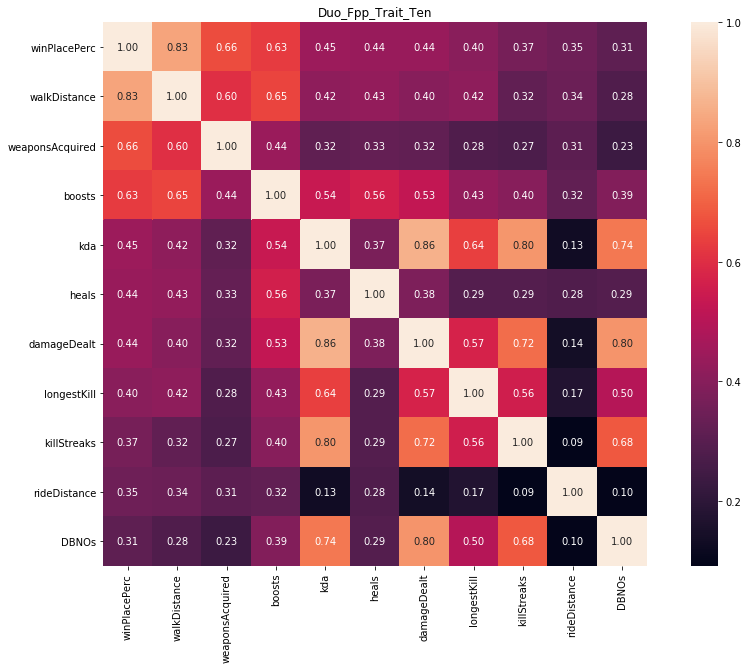

In [41]:
# 4.相关性过滤（绘制热图）
# 计算相关系数
corrmat = df.corr()

# 筛选出影响排名最高的前十因子
k = 11 #因为这个包括本身，所以k！=10，为11
cols = corrmat.nlargest(k, 'winPlacePerc')['winPlacePerc'].index #第一个参数就是截取的行数。第二个参数就是依据的列名

# 3.计算皮尔逊相关系数（度量两个变量之间的相关程度，其值介于-1与1之间）
cm = np.corrcoef(df[cols].values.T) #矩阵的行数=列数=矩阵1的行数*矩阵2的行数即 [10*10][1*1]

# 4.#绘制相关系数图（heatmap）
plt.subplots(figsize=(16,10))
sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},xticklabels=cols.values,yticklabels=cols.values)
#热图参数含义网址:http://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.title('Duo_Fpp_Trait_Ten') #设置标题
plt.savefig('./images/Duo_Fpp_Trait_Ten.png') #保存图片

In [42]:
# 5.存储归一化后的duo-fpp模式数据
lists_duo_fpp_ten = list(cols) #获取相关性最高的十个特征并存为列表
data_duo_fpp = df.loc[:,lists_duo_fpp_ten] #获取数据
data_duo_fpp.to_csv('../1-Data_Set/data_duo_fpp_trait_ten.csv',index=None,encoding = 'utf-8') #存储数据

In [54]:
# 八、对squad模式进行特征选择并保存






In [55]:
# 1.提取squad模式数据
squad = lists_matchType[5]
squad.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.60,0,0,0,64,...,0,0.0,0,0.0,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.27,0,0,0,74,...,0,0.0,0,0.0,0,0,65.67,1,0,0.2143
32,ffd9e56f13438e,8df2112760f9e2,3f8b160eeee685,0,1,61.90,1,0,1,31,...,0,529.1,0,0.0,0,0,327.30,2,0,0.3200
61,b23e720058fc87,a5a5052aa40425,6ccd7bc2061238,1,0,42.57,0,0,0,86,...,0,0.0,0,0.0,0,0,140.10,2,0,0.0769
76,707756a08b72fe,e8650092e8c52c,5c0f705f157bb1,0,0,47.85,0,0,5,62,...,0,0.0,0,0.0,0,0,565.50,3,0,0.4231


In [56]:
# 2.特征合并与预处理
# 删除不相关的列, 这是squad模式，尽管是组队模式，但组队Id对分析无影响
squads = squad.loc[:,(squad.columns != 'groupId') & (squad.columns != 'matchId')]

# 按照游戏Id分组，查看是否存在一人玩了多次游戏，即死亡次数
sq = squads.groupby(by='Id').count()
print(len(squads) == len(sq)) #查看分组后是否与未分组时数量一致，即死亡是否超过一次

# 计算kda并插入数据集
list_squads_column = squads.columns.tolist() #获取列名并转换为集合
kda = (squads['kills'] + squads['assists']) / 1 #计算kda
squads.insert(list_squads_column.index('heals')+1,'kda',kda) #参数分别为插入位置，被插入列的列名，被插入列的数据

# 删除不相关列
squads.drop(['Id','assists','kills','matchType'],axis=1,inplace=True) #删除Id是其位非数值型数据，无法归一化
squads.head()

True


F:\Anaconda\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,boosts,damageDealt,DBNOs,headshotKills,heals,kda,killPlace,killPoints,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
8,0,51.60,0,0,0,0.0,64,0,0,0.00,...,0,0.0,0,0.0,0,0,799.90,4,0,0.3704
9,0,37.27,0,0,0,0.0,74,0,0,0.00,...,0,0.0,0,0.0,0,0,65.67,1,0,0.2143
32,1,61.90,1,0,1,1.0,31,0,1,48.42,...,0,529.1,0,0.0,0,0,327.30,2,0,0.3200
61,0,42.57,0,0,0,1.0,86,0,0,0.00,...,0,0.0,0,0.0,0,0,140.10,2,0,0.0769
76,0,47.85,0,0,5,0.0,62,0,0,0.00,...,0,0.0,0,0.0,0,0,565.50,3,0,0.4231


In [57]:
# 3.数据无量纲化
# 数据归一化
scaler = MinMaxScaler() #实例化模型
result = scaler.fit_transform(squads) #训练和导出结果一步达成
df = pd.DataFrame(result,columns=squads.columns) #将归一化后的数据转换为Dataframe
df.head()

F:\Anaconda\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,boosts,damageDealt,DBNOs,headshotKills,heals,kda,killPlace,killPoints,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.00,0.013593,0.00000,0.0,0.0000,0.000,0.636364,0.0,0.000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.059561,0.067797,0.0,0.3704
1,0.00,0.009818,0.00000,0.0,0.0000,0.000,0.737374,0.0,0.000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.004890,0.016949,0.0,0.2143
2,0.05,0.016307,0.03125,0.0,0.0125,0.025,0.303030,0.0,0.125,0.048439,...,0.0,0.026232,0.0,0.0,0.0,0.0,0.024371,0.033898,0.0,0.3200
3,0.00,0.011214,0.00000,0.0,0.0000,0.025,0.858586,0.0,0.000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.010432,0.033898,0.0,0.0769
4,0.00,0.012605,0.00000,0.0,0.0625,0.000,0.616162,0.0,0.000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.042107,0.050847,0.0,0.4231


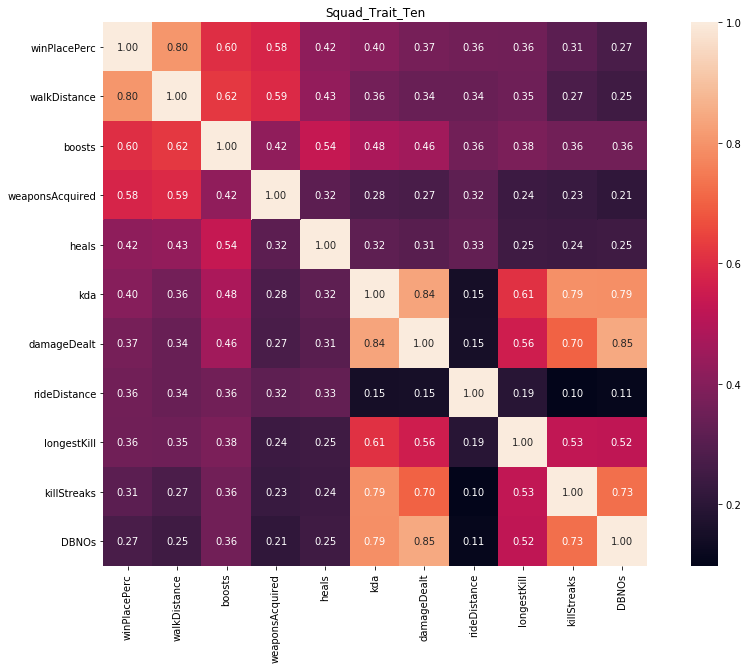

In [58]:
# 4.相关性过滤（绘制热图）
# 计算相关系数
corrmat = df.corr()

# 筛选出影响排名最高的前十因子
k = 11 #因为这个包括本身，所以k！=10，为11
cols = corrmat.nlargest(k, 'winPlacePerc')['winPlacePerc'].index #第一个参数就是截取的行数。第二个参数就是依据的列名

# 3.计算皮尔逊相关系数（度量两个变量之间的相关程度，其值介于-1与1之间）
cm = np.corrcoef(df[cols].values.T) #矩阵的行数=列数=矩阵1的行数*矩阵2的行数即 [10*10][1*1]

# 4.#绘制相关系数图（heatmap）
plt.subplots(figsize=(16,10))
sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},xticklabels=cols.values,yticklabels=cols.values)
#热图参数含义网址:http://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.title('Squad_Trait_Ten') #设置标题
plt.savefig('./images/Squad_Trait_Ten.png') #保存图片

In [59]:
# 5.存储归一化后的squad模式数据
lists_squad_ten = list(cols) #获取相关性最高的十个特征并存为列表
data_squad = df.loc[:,lists_squad_ten] #获取数据
data_squad.to_csv('../1-Data_Set/data_squad_trait_ten.csv',index=None,encoding = 'utf-8') #存储数据

In [60]:
# 九、对squad-fpp模式进行特征选择并保存






In [61]:
# 1.提取squad-fpp模式数据
squad_fpp = lists_matchType[6]
squad_fpp.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.7,3,0,0.1667
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.00,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.7,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.00,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.5,1,1497,0.0000


In [62]:
# 2.特征合并与预处理
# 删除不相关的列, 这是squad-fpp模式，尽管是组队模式，但组队Id对分析无影响
squads_fpp = squad_fpp.loc[:,(squad_fpp.columns != 'groupId') & (squad_fpp.columns != 'matchId')]

# 按照游戏Id分组，查看是否存在一人玩了多次游戏，即死亡次数
sq_fpp = squads_fpp.groupby(by='Id').count()
print(len(squads_fpp) == len(sq_fpp)) #查看分组后是否与未分组时数量一致，即死亡是否超过一次

# 计算kda并插入数据集
list_squads_fpp_column = squads_fpp.columns.tolist() #获取列名并转换为集合
kda = (squads_fpp['kills'] + squads_fpp['assists']) / 1 #计算kda
squads_fpp.insert(list_squads_fpp_column.index('heals')+1,'kda',kda) #参数分别为插入位置，被插入列的列名，被插入列的数据

# 删除不相关列
squads_fpp.drop(['Id','assists','kills','matchType'],axis=1,inplace=True) #删除Id是其位非数值型数据，无法归一化
squads_fpp.head()

True


F:\Anaconda\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,boosts,damageDealt,DBNOs,headshotKills,heals,kda,killPlace,killPoints,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0.00,0,0,0,0.0,60,1241,0,0.00,...,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444
1,0,91.47,0,0,0,0.0,57,0,0,0.00,...,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400
3,0,32.90,0,0,0,0.0,75,0,0,0.00,...,0,0.0000,0,0.00,0,0,202.7,3,0,0.1667
5,0,100.00,1,1,0,1.0,44,0,1,18.44,...,0,0.0000,0,0.00,0,0,34.7,1,0,0.0370
6,0,0.00,0,0,0,0.0,96,1262,0,0.00,...,0,0.0000,0,0.00,0,0,13.5,1,1497,0.0000


In [63]:
# 3.数据无量纲化
# 数据归一化
scaler = MinMaxScaler() #实例化模型
result = scaler.fit_transform(squads_fpp) #训练和导出结果一步达成
df = pd.DataFrame(result,columns=squads_fpp.columns) #将归一化后的数据转换为Dataframe
df.head()

F:\Anaconda\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,boosts,damageDealt,DBNOs,headshotKills,heals,kda,killPlace,killPoints,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.595960,0.576137,0.000,0.000000,...,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.018588,0.005650,0.733367,0.4444
1,0.0,0.027006,0.000000,0.0000,0.0,0.000000,0.565657,0.000000,0.000,0.000000,...,0.0,1.836735e-07,0.0,0.007113,0.0,0.0,0.108884,0.028249,0.000000,0.6400
2,0.0,0.009714,0.000000,0.0000,0.0,0.000000,0.747475,0.000000,0.000,0.000000,...,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.015391,0.016949,0.000000,0.1667
3,0.0,0.029525,0.038462,0.0625,0.0,0.034483,0.434343,0.000000,0.125,0.018706,...,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.002635,0.005650,0.000000,0.0370
4,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.959596,0.585887,0.000,0.000000,...,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.001025,0.005650,0.748874,0.0000


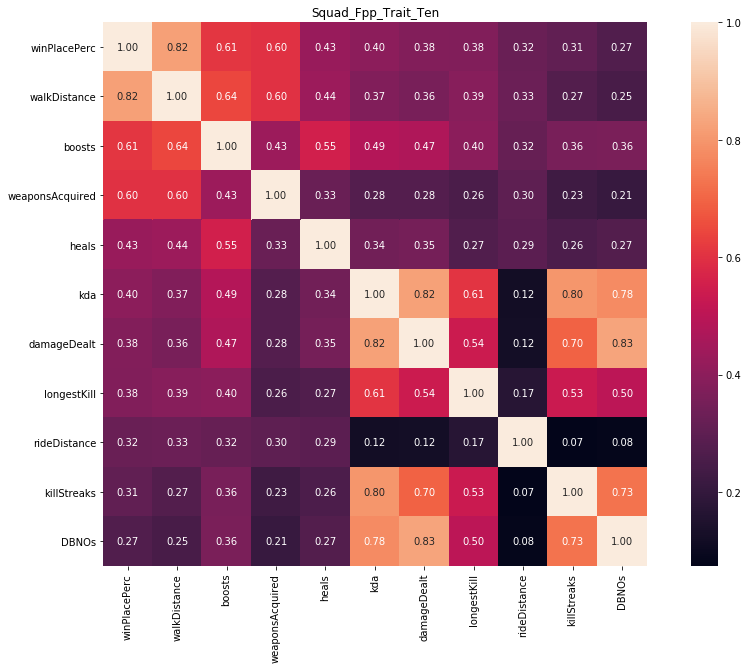

In [64]:
# 4.相关性过滤（绘制热图）
# 计算相关系数
corrmat = df.corr()

# 筛选出影响排名最高的前十因子
k = 11 #因为这个包括本身，所以k！=10，为11
cols = corrmat.nlargest(k, 'winPlacePerc')['winPlacePerc'].index #第一个参数就是截取的行数。第二个参数就是依据的列名

# 3.计算皮尔逊相关系数（度量两个变量之间的相关程度，其值介于-1与1之间）
cm = np.corrcoef(df[cols].values.T) #矩阵的行数=列数=矩阵1的行数*矩阵2的行数即 [10*10][1*1]

# 4.#绘制相关系数图（heatmap）
plt.subplots(figsize=(16,10))
sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},xticklabels=cols.values,yticklabels=cols.values)
#热图参数含义网址:http://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.title('Squad_Fpp_Trait_Ten') #设置标题
plt.savefig('./images/Squad_Fpp_Trait_Ten.png') #保存图片

In [65]:
# 5.存储归一化后的squad-fpp模式数据
lists_squad_fpp_ten = list(cols) #获取相关性最高的十个特征并存为列表
data_squad_fpp = df.loc[:,lists_squad_fpp_ten] #获取数据
data_squad_fpp.to_csv('../1-Data_Set/data_squad_fpp_trait_ten.csv',index=None,encoding = 'utf-8') #存储数据

In [ ]:
# 十、对other模式进行特征选择并保存






In [66]:
# 1.提取other模式数据
other = lists_matchType[2]
other.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
218,7bd9e1b45cd3d8,9e132c0869c965,ae4771bde3e2ec,0,3,335.90,1,0,4,16,...,0,3899.0,0,0.0,0,0,3187.00,5,0,0.8000
904,c8ed6a171536e3,84748458aba82a,d4f1811cf6a04b,1,3,187.40,0,1,6,27,...,0,0.0,0,0.0,0,0,1342.00,1,0,0.4898
1052,d3c4dd2e585d21,6af9bb6b56b722,16e6befa897b44,0,0,0.00,0,0,0,88,...,0,0.0,0,0.0,0,0,0.00,0,0,0.0000
1249,b0fbbe07014fcd,7ce6194a5dd609,e330f44c528e6f,0,0,20.94,0,0,0,55,...,0,0.0,0,0.0,0,0,13.64,1,0,0.0625
1434,7aafc27157770a,16dfe6ae8dcb3e,09afe74c0308b2,0,3,486.70,2,0,9,30,...,0,3869.0,0,0.0,0,0,1318.00,4,1500,0.9677


In [69]:
# 2.特征合并与预处理
# 删除不相关的列, 这是other模式，可能是组队模式，也可能不是，但依然要删除组队Id和匹配项Id
others = other.loc[:,(other.columns != 'groupId') & (other.columns != 'matchId')]

# 按照游戏Id分组，查看是否存在一人玩了多次游戏，即死亡次数
ot = others.groupby(by='Id').count()
print(len(others) == len(ot)) #查看分组后是否与未分组时数量一致，即死亡是否超过一次

# 计算kda并插入数据集
list_others_column = others.columns.tolist() #获取列名并转换为集合
kda = (others['kills'] + others['assists']) / 1 #计算kda
others.insert(list_others_column.index('heals')+1,'kda',kda) #参数分别为插入位置，被插入列的列名，被插入列的数据

# 删除不相关列
others.drop(['Id','assists','kills','matchType'],axis=1,inplace=True) #删除Id是其位非数值型数据，无法归一化
others.head()

True


F:\Anaconda\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,boosts,damageDealt,DBNOs,headshotKills,heals,kda,killPlace,killPoints,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
218,3,335.90,1,0,4,1.0,16,0,1,5.6500,...,0,3899.0,0,0.0,0,0,3187.00,5,0,0.8000
904,3,187.40,0,1,6,2.0,27,0,1,0.8007,...,0,0.0,0,0.0,0,0,1342.00,1,0,0.4898
1052,0,0.00,0,0,0,0.0,88,0,0,0.0000,...,0,0.0,0,0.0,0,0,0.00,0,0,0.0000
1249,0,20.94,0,0,0,0.0,55,0,0,0.0000,...,0,0.0,0,0.0,0,0,13.64,1,0,0.0625
1434,3,486.70,2,0,9,0.0,30,1000,0,0.0000,...,0,3869.0,0,0.0,0,0,1318.00,4,1500,0.9677


In [70]:
# 3.数据无量纲化
# 数据归一化
scaler = MinMaxScaler() #实例化模型
result = scaler.fit_transform(others) #训练和导出结果一步达成
df = pd.DataFrame(result,columns=others.columns) #将归一化后的数据转换为Dataframe
df.head()

F:\Anaconda\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,boosts,damageDealt,DBNOs,headshotKills,heals,kda,killPlace,killPoints,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.25,0.060851,0.018868,0.00000,0.108108,0.015625,0.151515,0.0,0.071429,0.005335,...,0.0,0.276721,0.0,0.0,0.0,0.0,0.362283,0.054348,0.0,0.8000
1,0.25,0.033949,0.000000,0.02439,0.162162,0.031250,0.262626,0.0,0.071429,0.000756,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.152552,0.010870,0.0,0.4898
2,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.878788,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0000
3,0.00,0.003793,0.000000,0.00000,0.000000,0.000000,0.545455,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.001551,0.010870,0.0,0.0625
4,0.25,0.088170,0.037736,0.00000,0.243243,0.000000,0.292929,1.0,0.000000,0.000000,...,0.0,0.274592,0.0,0.0,0.0,0.0,0.149824,0.043478,1.0,0.9677


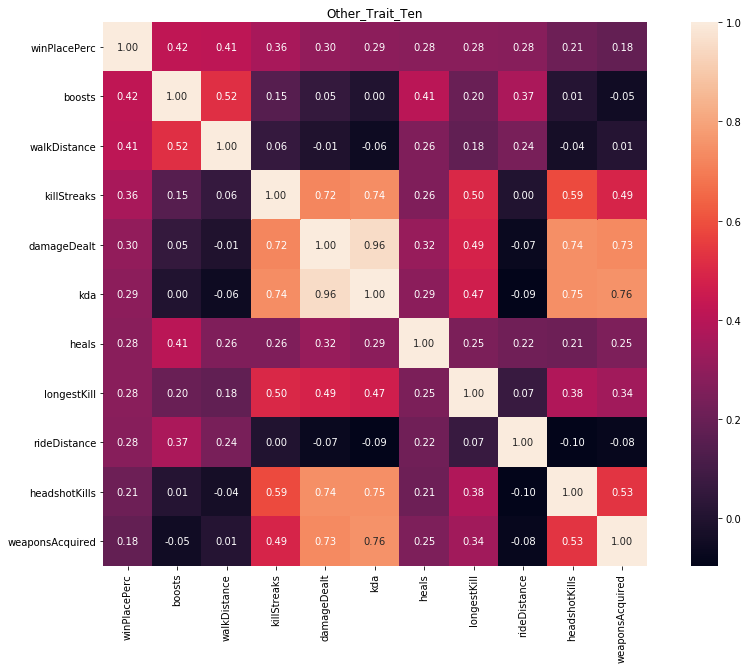

In [71]:
# 4.相关性过滤（绘制热图）
# 计算相关系数
corrmat = df.corr()

# 筛选出影响排名最高的前十因子
k = 11 #因为这个包括本身，所以k！=10，为11
cols = corrmat.nlargest(k, 'winPlacePerc')['winPlacePerc'].index #第一个参数就是截取的行数。第二个参数就是依据的列名

# 3.计算皮尔逊相关系数（度量两个变量之间的相关程度，其值介于-1与1之间）
cm = np.corrcoef(df[cols].values.T) #矩阵的行数=列数=矩阵1的行数*矩阵2的行数即 [10*10][1*1]

# 4.#绘制相关系数图（heatmap）
plt.subplots(figsize=(16,10))
sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},xticklabels=cols.values,yticklabels=cols.values)
#热图参数含义网址:http://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.title('Other_Trait_Ten') #设置标题
plt.savefig('./images/Other_Trait_Ten.png') #保存图片

In [72]:
# 5.存储归一化后的other模式数据
lists_other_ten = list(cols) #获取相关性最高的十个特征并存为列表
data_other = df.loc[:,lists_other_ten] #获取数据
data_other.to_csv('../1-Data_Set/data_other_trait_ten.csv',index=None,encoding = 'utf-8') #存储数据